# Bitacora #2 - Entrenamiento Intensivo
**Fecha:** 2026-02-15  
**Autor:** Francis Bravo  

## 1. Cambios realizados en esta sesion

### 1.1 Creacion de READMEs (29 archivos)
Se creo un `README.md` en cada carpeta y subcarpeta del proyecto para documentar su contenido.

**Carpetas principales (11):**
- `bot/` - Implementaciones de jugadores (CNN_bot, CNN_F_bot, random_bot, human)
- `models/` - Arquitecturas CNN (CNN1, CNN_uncoupled, CNNfrancis, CNN_fdec)
- `QuartoRL/` - Funciones de RL (gen_experience, DQN_training_step, contest, plotting, observers)
- `utils/` - Utilidades (env_bootstrap, logger, play_games_compat, bradley_terry)
- `CHECKPOINTS/` - Pesos de modelos organizados por experimento
- `analysis/` - Notebooks de analisis de experimentos
- `development/` - Herramientas de desarrollo y debugging
- `logs/` - Logs de entrenamiento
- `tests/` - Notebooks de testing
- `train_scripts/` - Scripts generados para barridos de hiperparametros
- `partidas_guardadas/` - CSVs de partidas jugadas

**Subcarpetas de analysis (10):**
BT1, E02_win_rate, E02_wr, E03_BS, E04_N_LAST_STATES, E05_HYPERPARAMETER_ANALYSIS, E06_architecture_prebug, E08_loss-balance, legacy, XYZ

**Subcarpetas de development (3):**
01 remove files, 02_includingBT, 03_validate_deserialize_boards

**Subcarpetas de CHECKPOINTS (6):**
05_LOSS, EXP_id03, Francis, LOSS_APPROACHs_1212-2_only_select, others, REF

### 1.2 Modificacion del readme.md raiz
Se agrego:
- Aviso destacado al inicio: solo modificar parametros de entrenamiento
- Seccion "Reglas de Modificacion" con lista de parametros PERMITIDOS y carpetas PROHIBIDAS

## 2. Parametros del entrenamiento actual

Parametros configurados en ambos scripts (valores identicos).
Cada parametro tiene hipervinculos a la linea exacta en ambos archivos:
- [`trainRL.py`](trainRL.py) — entrenamiento desde cero
- [`trainRL_resume_latest.py`](trainRL_resume_latest.py) — reanudar desde ultimo checkpoint

### 2.1 Configuracion principal

| Parametro | Valor | trainRL | resume | Descripcion |
|-----------|-------|---------|--------|-------------|
| STARTING_NET | `None` | [L43](trainRL.py#L43) | [L46](trainRL_resume_latest.py#L46) | Pesos aleatorios (sin checkpoint previo) |
| EXPERIMENT_NAME | `"05_LOSS"` | [L44](trainRL.py#L44) | [L47](trainRL_resume_latest.py#L47) | Nombre del experimento |
| ARCHITECTURE | `QuartoCNN_uncoupled` | [L50](trainRL.py#L50) | [L54](trainRL_resume_latest.py#L54) | Red con cabezas independientes |
| LOSS_APPROACH | `"combined_avg"` | [L51](trainRL.py#L51) | [L55](trainRL_resume_latest.py#L55) | Promedio de Q-values de place y select |
| REWARD_FUNCTION | `"propagate"` | [L52](trainRL.py#L52) | [L56](trainRL_resume_latest.py#L56) | Recompensa final propagada a todos los estados |

### 2.2 Hiperparametros de entrenamiento

| Parametro | Valor | trainRL | resume | Descripcion |
|-----------|-------|---------|--------|-------------|
| EPOCHS | `3000` | [L66](trainRL.py#L66) | [L70](trainRL_resume_latest.py#L70) | Epocas totales |
| BATCH_SIZE | `30` | [L61](trainRL.py#L61) | [L65](trainRL_resume_latest.py#L65) | Muestras por batch |
| LR | `5e-5` | [L111](trainRL.py#L111) | [L117](trainRL_resume_latest.py#L117) | Learning rate inicial |
| LR_F | `5e-5` | [L112](trainRL.py#L112) | [L118](trainRL_resume_latest.py#L118) | Learning rate final (constante, sin decay) |
| TAU | `0.01` | [L113](trainRL.py#L113) | [L119](trainRL_resume_latest.py#L119) | Tasa de soft update del target network |
| GAMMA | `0.99` | [L115](trainRL.py#L115) | [L121](trainRL_resume_latest.py#L121) | Factor de descuento |
| MAX_GRAD_NORM | `1.0` | [L110](trainRL.py#L110) | [L116](trainRL_resume_latest.py#L116) | Clipping de gradientes |
| torch.manual_seed | `5` | [L171](trainRL.py#L171) | [L204](trainRL_resume_latest.py#L204) | Semilla para reproducibilidad |

### 2.3 Generacion de experiencia

| Parametro | Valor | trainRL | resume | Descripcion |
|-----------|-------|---------|--------|-------------|
| GEN_EXPERIENCE_BY_EPOCH | `True` | [L56](trainRL.py#L56) | [L60](trainRL_resume_latest.py#L60) | Generar experiencia nueva cada epoca |
| MATCHES_PER_EPOCH | `100` | [L73](trainRL.py#L73) | [L77](trainRL_resume_latest.py#L77) | Partidas de self-play por epoca |
| N_LAST_STATES_INIT | `2` | [L69](trainRL.py#L69) | [L73](trainRL_resume_latest.py#L73) | Estados del historial (inicio) |
| N_LAST_STATES_FINAL | `2` | [L71](trainRL.py#L71) | [L75](trainRL_resume_latest.py#L75) | Estados del historial (final, sin curriculum) |
| TEMPERATURE_EXPLORE | `2` | [L91](trainRL.py#L91) | [L95](trainRL_resume_latest.py#L95) | Temperatura para exploracion (self-play) |
| TEMPERATURE_EXPLOIT | `0.1` | [L94](trainRL.py#L94) | [L98](trainRL_resume_latest.py#L98) | Temperatura para explotacion (evaluacion) |
| mode_2x2 | `True` | [L63](trainRL.py#L63) | [L67](trainRL_resume_latest.py#L67) | Victoria por cuadrado 2x2 habilitada |

### 2.4 Evaluacion y guardado

| Parametro | Valor | trainRL | resume | Descripcion |
|-----------|-------|---------|--------|-------------|
| N_MATCHES_EVAL | `30` | [L59](trainRL.py#L59) | [L63](trainRL_resume_latest.py#L63) | Partidas de evaluacion vs baselines por epoca |
| FREQ_EPOCH_SAVING | `1000` | [L96](trainRL.py#L96) | [L100](trainRL_resume_latest.py#L100) | Guardar modelo cada N epocas |
| FREQ_EPOCH_PLOT_SHOW | `50` | [L101](trainRL.py#L101) | [L105](trainRL_resume_latest.py#L105) | Mostrar plots cada N epocas |
| SMOOTHING_WINDOW | `10` | [L104](trainRL.py#L104) | [L110](trainRL_resume_latest.py#L110) | Ventana de suavizado para plots |
| Q_PLOT_TYPE | `"hist"` | [L107](trainRL.py#L107) | [L113](trainRL_resume_latest.py#L113) | Tipo de plot de Q-values |

### 2.5 Parametros exclusivos de trainRL_resume_latest.py

| Parametro | Valor | Linea | Descripcion |
|-----------|-------|-------|-------------|
| AUTO_RESUME_LATEST | `True` | [L44](trainRL_resume_latest.py#L44) | Auto-detectar ultimo checkpoint |
| PLOT_ON_FIRST_EPOCH | `True` | [L107](trainRL_resume_latest.py#L107) | Mostrar plots en primera epoca resumida |

### 2.6 Baselines de evaluacion

| Baseline | Checkpoint | trainRL | resume |
|----------|-----------|---------|--------|
| bot_loss-BT | `LOSS_APPROACHs_1212-2_only_select` epoch 1034 | [L119](trainRL.py#L119) | [L148](trainRL_resume_latest.py#L148) |
| bot_random | `EXP_id03` epoch 0000 | [L130](trainRL.py#L130) | [L159](trainRL_resume_latest.py#L159) |

## 3. Valores derivados

Valores calculados automaticamente a partir de los parametros:

| Valor | Calculo | Resultado | trainRL | resume |
|-------|---------|----------|---------|--------|
| STEPS_PER_EPOCH | N_LAST_STATES_FINAL * MATCHES_PER_EPOCH | 2 * 100 = **200** | [L75](trainRL.py#L75) | [L79](trainRL_resume_latest.py#L79) |
| ITER_PER_EPOCH | STEPS_PER_EPOCH // BATCH_SIZE | 200 // 30 = **6** | [L77](trainRL.py#L77) | [L81](trainRL_resume_latest.py#L81) |
| REPLAY_SIZE | 100 * STEPS_PER_EPOCH | 100 * 200 = **20,000** | [L81](trainRL.py#L81) | [L85](trainRL_resume_latest.py#L85) |
| N_BATCHS_2_UPDATE_TARGET | ITER_PER_EPOCH // 3 | 6 // 3 = **2** | [L87](trainRL.py#L87) | [L91](trainRL_resume_latest.py#L91) |

### Notas:
- **LR constante**: LR == LR_F = 5e-5 (sin cosine annealing efectivo)
- **Sin curriculum**: N_LAST_STATES_INIT == N_LAST_STATES_FINAL = 2
- **6 iteraciones DQN por epoca** con 100 partidas de self-play
- **Target network se actualiza 2 veces por epoca** (cada 2 batches)

## 3.1 Bug corregido en trainRL_resume_latest.py

**Problema:** Al reanudar entrenamiento, los datos historicos (win_rate, loss, q_values, epochs_results)
NO se cargaban del archivo pickle. Esto causaba:
1. Las graficas solo mostraban datos de la sesion actual, no el historial completo
2. El archivo pickle se sobreescribia perdiendo TODOS los datos previos
3. El contador `step_i` reiniciaba en -1, desalineando los epoch boundaries del loss plot

**Solucion:** Se agrego bloque de restauracion en [linea 282](trainRL_resume_latest.py#L282) que:
- Carga `epochs_results`, `loss_data`, `win_rate`, `q_values_history` del pickle existente
- Restaura `step_i` al ultimo valor guardado para mantener continuidad
- Log informativo con cantidad de datos restaurados
- Manejo de errores: si falla la carga, continua con historial vacio

```python
# --- Restore historical training data when resuming ---
if loaded_epoch > 0:
    _pkl_path = path.join(CHECKPOINT_FOLDER, f"{EXPERIMENT_NAME}.pkl")
    if path.exists(_pkl_path):
        with open(_pkl_path, "rb") as f:
            _saved = pickle.load(f)
        epochs_results = _saved.get("epochs_results", epochs_results)
        loss_data = _saved.get("loss_values", loss_data)
        win_rate = _saved.get("win_rate", win_rate)
        q_values_history = _saved.get("q_values_history", q_values_history)
        if loss_data["epoch_values"]:
            step_i = loss_data["epoch_values"][-1]
```

## 4. Registro de entrenamientos

<a id="train-table"></a>

| # | Fecha | Script | Epocas | Notas | Graficas | Resultado |
|---|-------|--------|--------|-------|----------|-----------|
| <a id="train-1"></a>1 | 2026-02-15 | trainRL.py | 3500 | Test largo de 3500 epocas | [ver anexo](#anexo-1) | Se lo realizo para hacer un analisis profundo y saber cuales son sus problemas iniciales con los parametros que estan configurados por defecto |

<a id="anexo-1"></a>

### Anexo 1 — Entrenamiento #1 ([volver a tabla](#train-1))

#### Win Rate

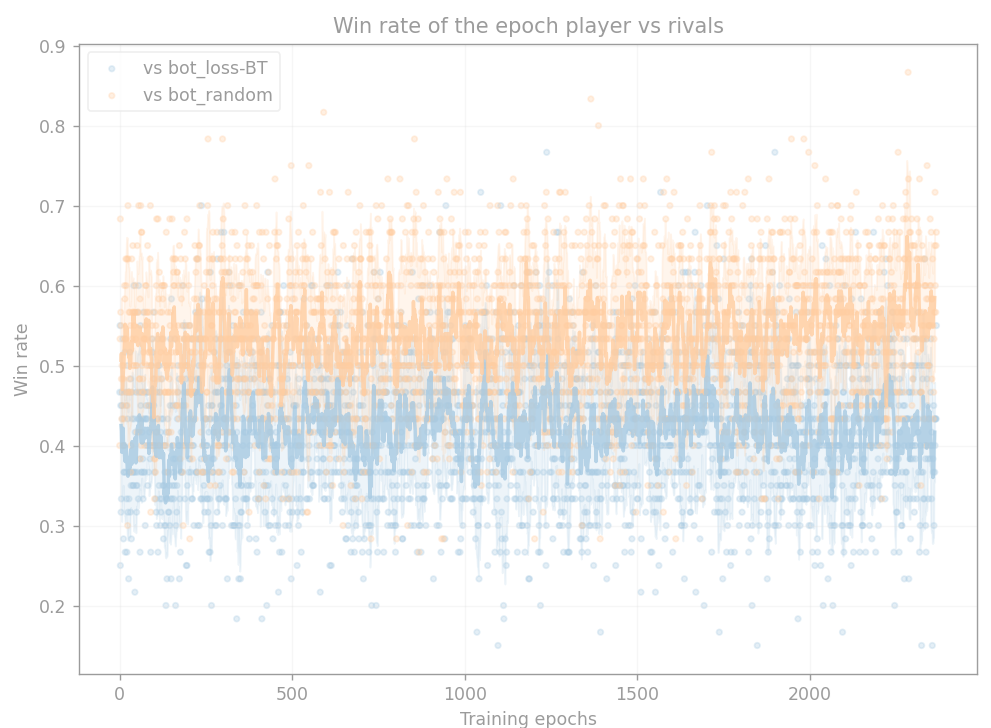

In [1]:
from IPython.display import display, Image, Markdown
from os import path

IMG_FOLDER = r"C:\Users\bravo\Documents\Metodos Numericos Pycharm\Mech Interp\Imagenes de la Bitacoras"

display(Markdown("#### Win Rate"))
display(Image(filename=path.join(IMG_FOLDER, "WinRateEpochPlayervsRivalsParamDefecto15-02.png")))

#### Loss

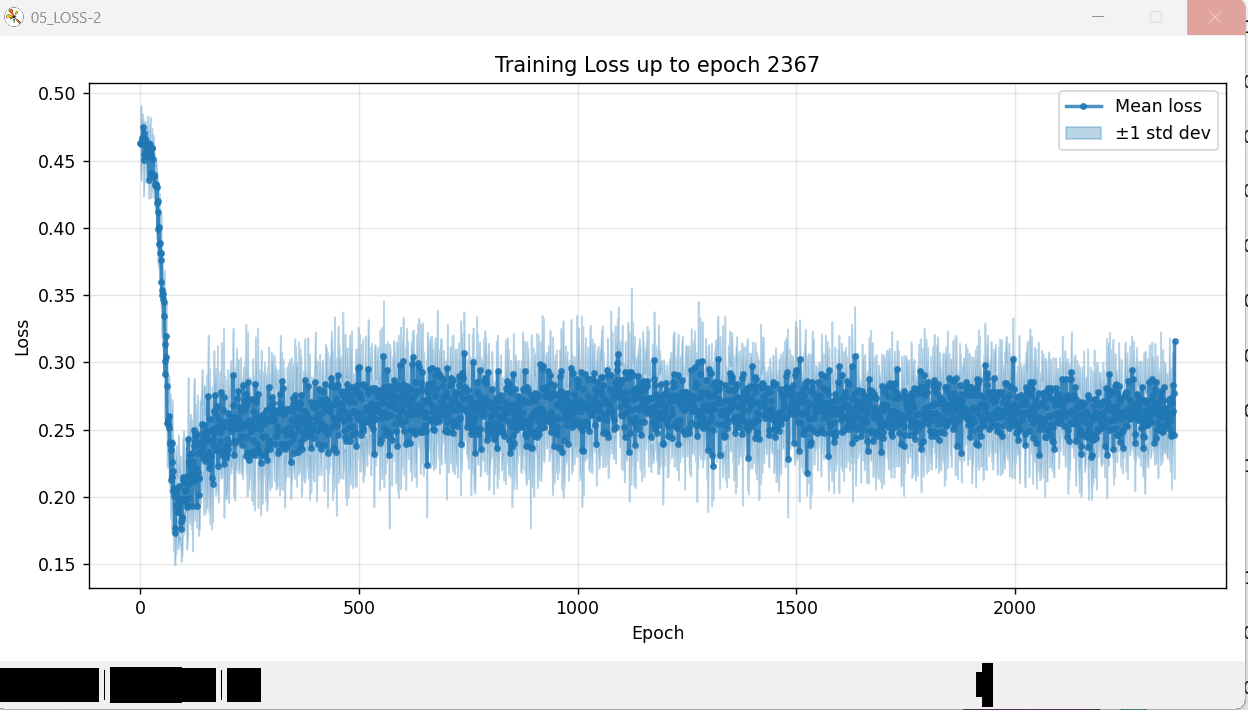

In [2]:
display(Markdown("#### Loss"))
display(Image(filename=path.join(IMG_FOLDER, "05_Loss-2Parametros por defecto15-02.png")))

#### Boards

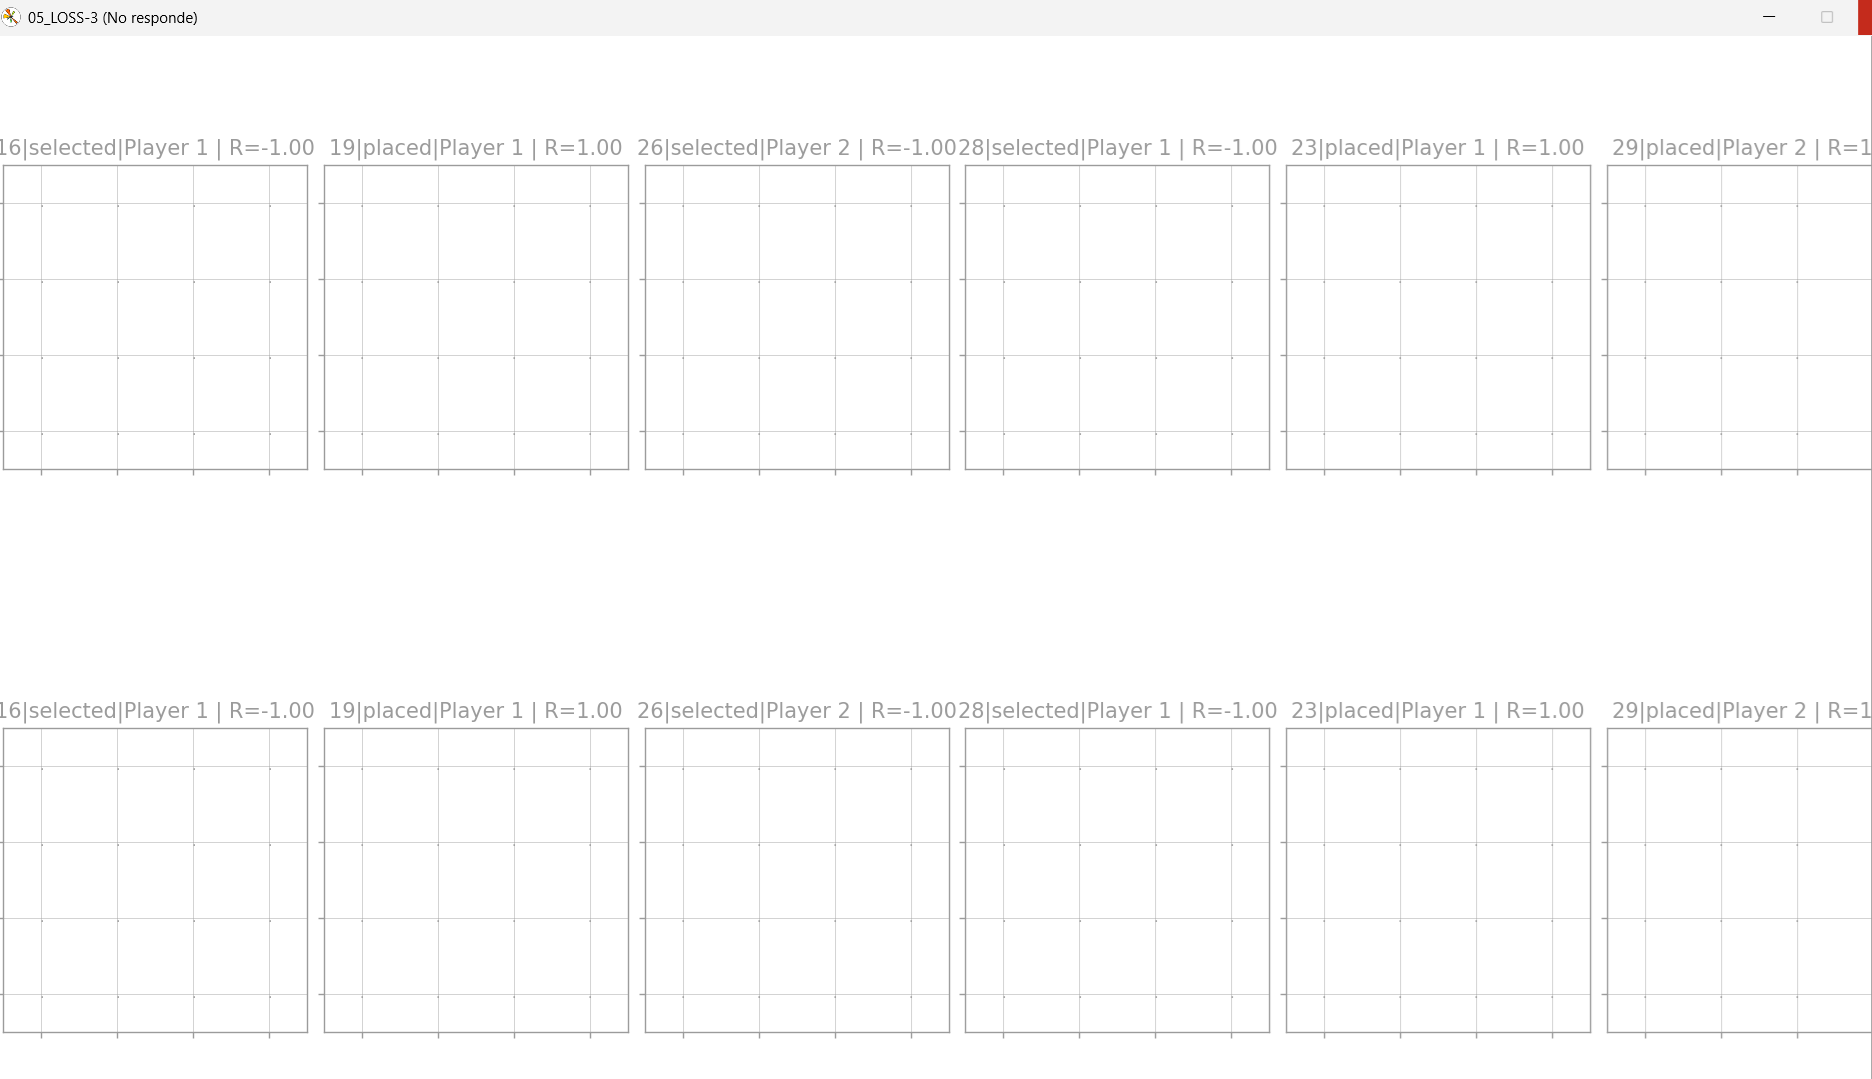

In [3]:
display(Markdown("#### Boards"))
display(Image(filename=path.join(IMG_FOLDER, "Loss3ParamDefect15-02.png")))

#### Q-values

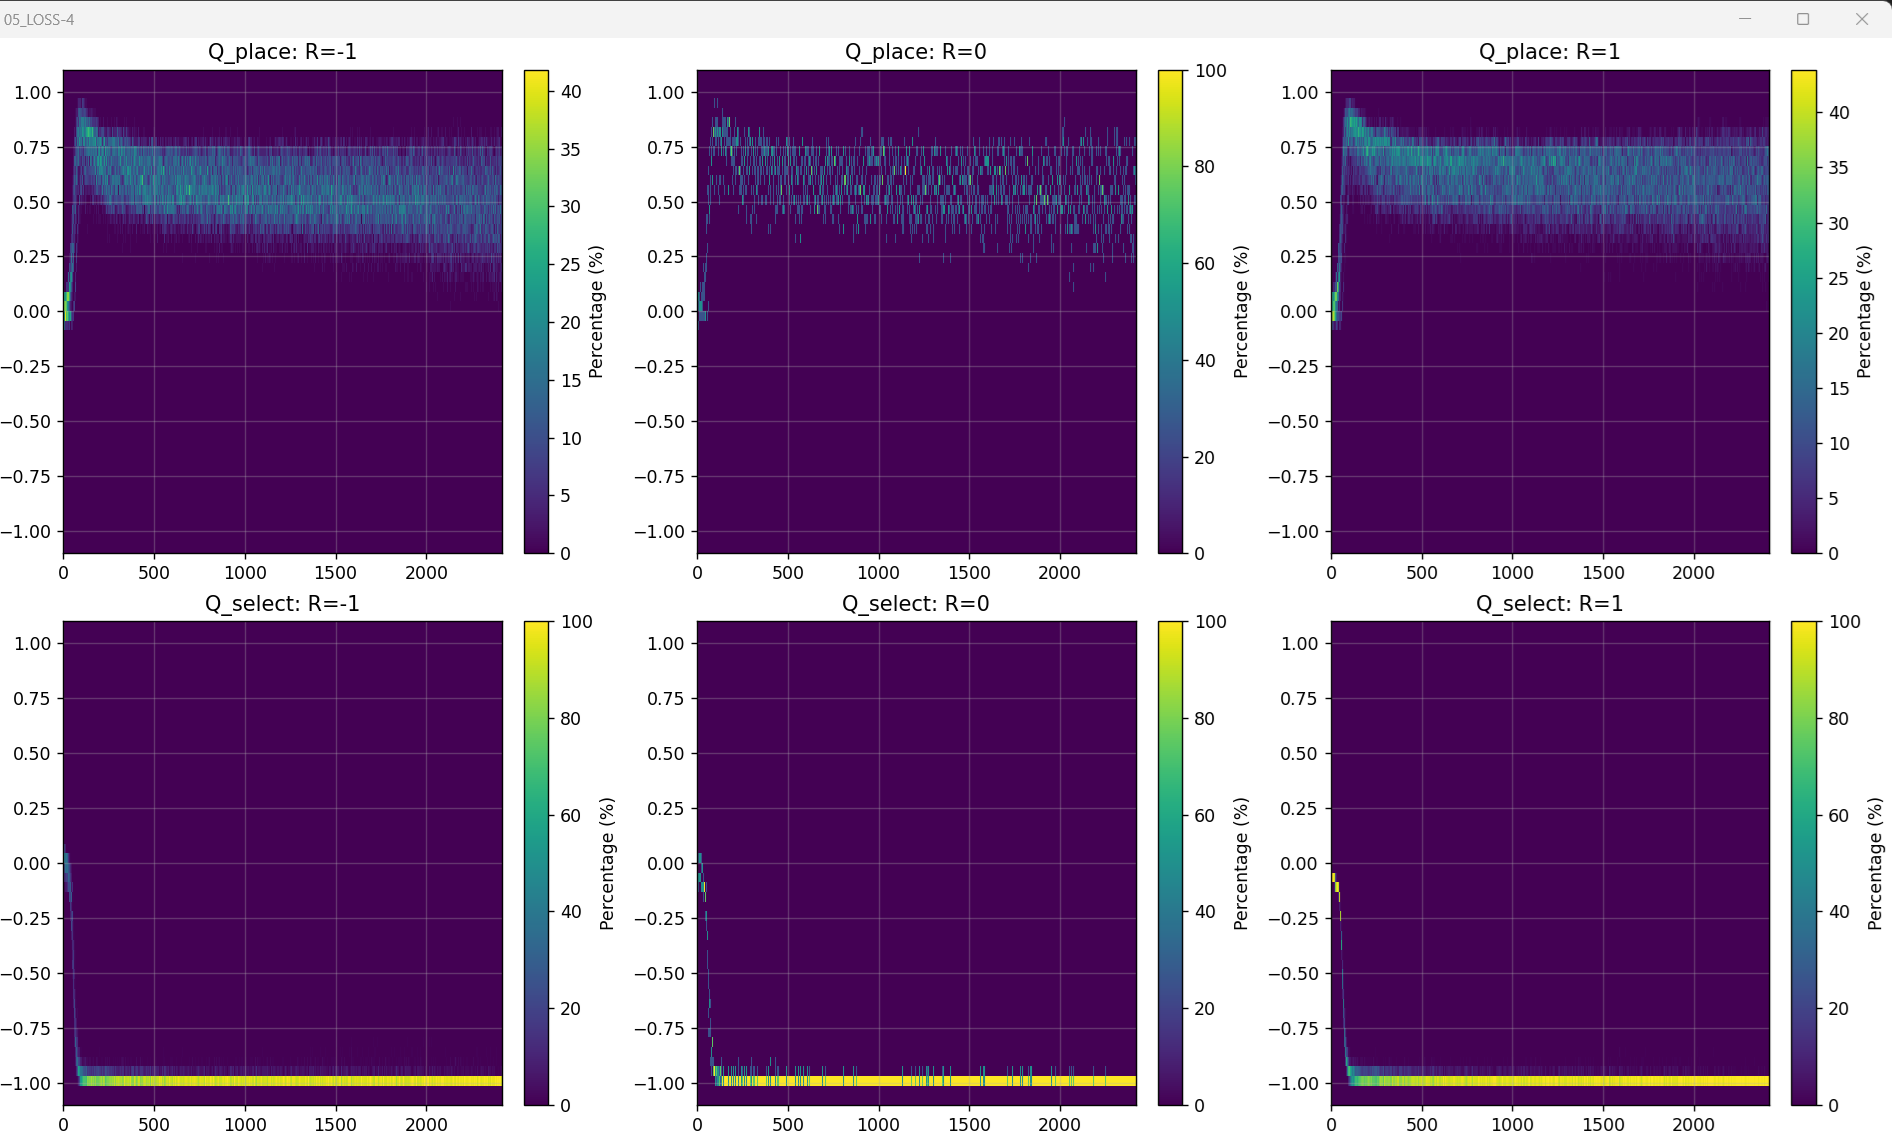

In [4]:
display(Markdown("#### Q-values"))
display(Image(filename=path.join(IMG_FOLDER, "Loss4ParamDefect15-02.png")))

**Observaciones:**
- (Pendiente)